In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
df = pd.read_csv(
    r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML471_S1_Datafile_Concept.csv"
)

# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Set DATE as index
df.set_index('DATE', inplace=True)


In [3]:
decomposition = seasonal_decompose(
    df['Consumption'],
    model='additive',   # additive because seasonal magnitude is constant
    period=12           # monthly seasonality
)


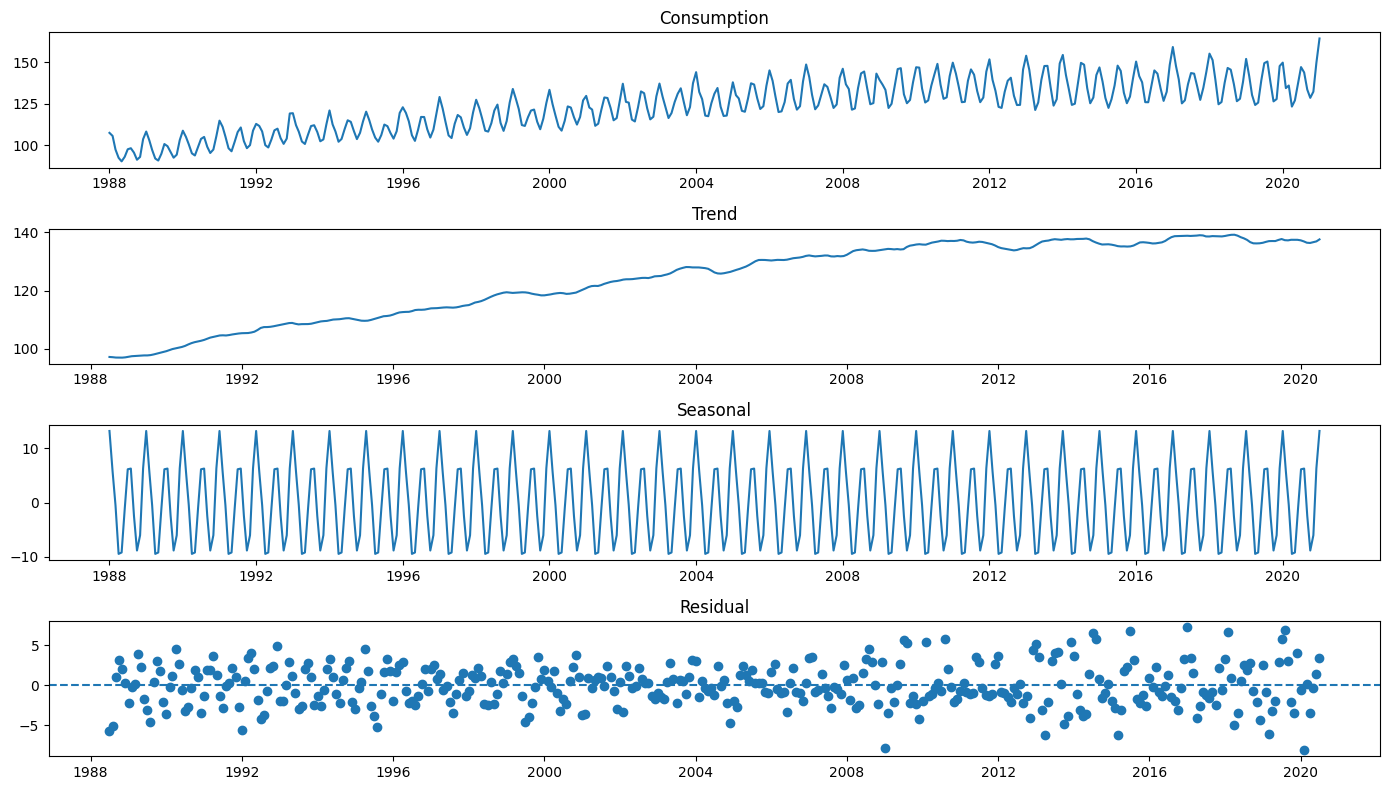

In [4]:
plt.figure(figsize=(14, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.title("Consumption")

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title("Trend")

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title("Seasonal")

plt.subplot(4, 1, 4)
plt.scatter(decomposition.resid.index, decomposition.resid)
plt.axhline(0, linestyle='--')
plt.title("Residual")

plt.tight_layout()
plt.show()


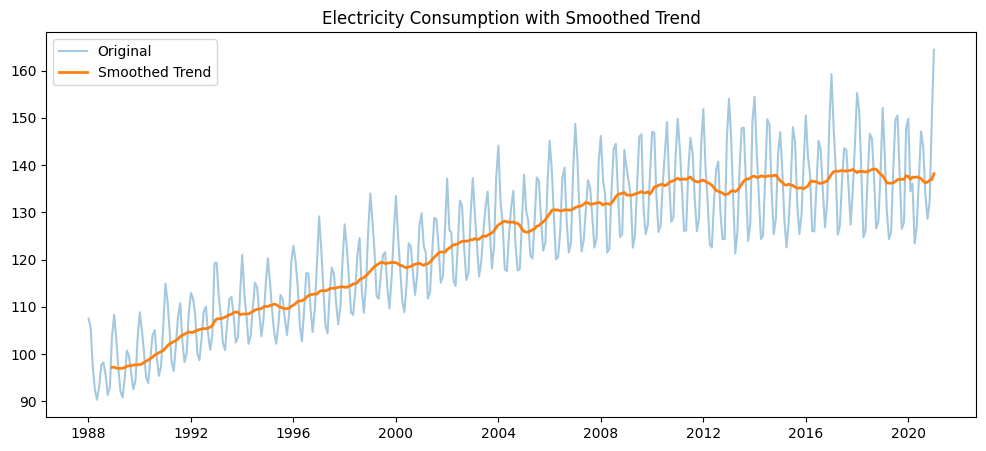

In [5]:
df['Smoothed_Trend'] = df['Consumption'].rolling(window=12).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['Consumption'], alpha=0.4, label='Original')
plt.plot(df['Smoothed_Trend'], linewidth=2, label='Smoothed Trend')
plt.title("Electricity Consumption with Smoothed Trend")
plt.legend()
plt.show()
